In [1]:
import numpy as np
import os
import sys
import glob
from PIL import Image, ImageMorph, ImageFilter
import tqdm
import matplotlib.pyplot as plt
import cv2
import tqdm
import moviepy
import moviepy.editor
import pickle
import torch
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from joblib import Parallel, delayed
import joblib

import decord
decord.bridge.set_bridge('torch')

import moviepy
from moviepy.editor import *

In [10]:
vr = decord.VideoReader('./results/john-oliver--prev_next-textured-depth_normal-no_gan_loss/video_com-audio1.mp4')
video1 = vr.get_batch(np.arange(len(vr)))
print(len(vr))

vr = decord.VideoReader('./results/john-oliver--prev_next-textured-depth_normal-no_gan_loss/video_com-audio1-latest.mp4')
video2 = vr.get_batch(np.arange(len(vr)))
print(len(vr))

vr = decord.VideoReader('./results/john-oliver--prev_next-textured-depth_normal-no_l1_loss/video_com-audio1.mp4')
video3 = vr.get_batch(np.arange(len(vr)))
print(len(vr))
print(video3.shape)

vr = decord.VideoReader('./results/oliver.mp4')
video4 = vr.get_batch(np.arange(500))[:,:,1024:,:]
print(video4.shape)
print(len(vr))

# video_com = torch.cat([video4, video3, video2, video1], 2).numpy()


500
torch.Size([500, 512, 512, 3])
torch.Size([500, 512, 1024, 3])
960


In [66]:
# vr = decord.VideoReader('./results-audio2/chemistry-mesh-uv-depth-normal-bg/video_com-audio1.mp4')
# print(len(vr))
# video1 = vr.get_batch(np.arange(len(vr)))
# b = len(vr)

# vr = decord.VideoReader('./data/chemistry-SHOW1/audio2mesh/audio2/untexture_meshes.mp4')
# print(len(vr))
# video2 = vr.get_batch(np.arange(b))

# vr = decord.VideoReader('./data/chemistry-SHOW1/audio2mesh/audio2/texture_meshes.mp4')
# print(len(vr))
# video3 = vr.get_batch(np.arange(b))

vr = decord.VideoReader('./results-audio1/seth-mesh-uv-depth-normal-bg/video_com-audio1.mp4')
print(len(vr))
video1 = vr.get_batch(np.arange(len(vr)))
b = len(vr)

vr = decord.VideoReader('./results-audio1/seth-mesh-no-depth-normal-bg/video_com-audio1.mp4')
print(len(vr))
video2 = vr.get_batch(np.arange(b))

vr = decord.VideoReader('./results-audio1/seth-mesh-uv-bg/video_com-audio1.mp4')
print(len(vr))
video3 = vr.get_batch(np.arange(b))

vr = decord.VideoReader('./data/seth-SHOW1/audio2mesh/audio1/untexture_meshes.mp4')
print(len(vr))
video4 = vr.get_batch(np.arange(b))

video_com = torch.cat([video4, video3, video2, video1], 2).numpy()
moviepy.editor.ImageSequenceClip(sequence=[(npyFrame).clip(0.0, 255.0).round().astype(np.uint8) 
                                        for npyFrame in video_com], fps=30).write_videofile('./results-audio1/seth-mesh-uv-depth-normal-bg/video_final_ablation.mp4')

300
300
300
300


t:   1%|          | 2/300 [1:22:56<205:58:34, 2488.31s/it, now=None]

Moviepy - Building video ./results-audio1/seth-mesh-uv-depth-normal-bg/video_final_ablation.mp4.
Moviepy - Writing video ./results-audio1/seth-mesh-uv-depth-normal-bg/video_final_ablation.mp4



t:   1%|          | 2/300 [1:22:58<206:04:25, 2489.48s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./results-audio1/seth-mesh-uv-depth-normal-bg/video_final_ablation.mp4


In [70]:
videoclip = VideoFileClip("./results-audio2/john-oliver-mesh-uv-depth-normal-bg/video_final_ablation.mp4")
audioclip = AudioFileClip("./data/john-oliver-SHOW1/audio2mesh/audio2/101706-00_05_51-00_05_56.wav")

print(videoclip.fps * videoclip.duration)

new_audioclip = CompositeAudioClip([audioclip])
videoclip.audio = new_audioclip
videoclip.write_videofile("./results-audio2/john-oliver-mesh-uv-depth-normal-bg/video_final_ablation_audio.mp4")

t:   1%|          | 2/300 [1:25:26<212:10:17, 2563.14s/it, now=None]

150.0
Moviepy - Building video ./results-audio2/john-oliver-mesh-uv-depth-normal-bg/video_final_ablation_audio.mp4.
MoviePy - Writing audio in video_final_ablation_audioTEMP_MPY_wvf_snd.mp3


t:   1%|          | 2/300 [1:25:26<212:10:32, 2563.20s/it, now=None]

MoviePy - Done.
Moviepy - Writing video ./results-audio2/john-oliver-mesh-uv-depth-normal-bg/video_final_ablation_audio.mp4



t:   1%|          | 2/300 [1:25:27<212:13:36, 2563.82s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./results-audio2/john-oliver-mesh-uv-depth-normal-bg/video_final_ablation_audio.mp4


In [20]:
vr = decord.VideoReader('./results/conan-mesh-uv-depth-normal-bg/video_com-audio1.mp4')
print(len(vr))
video4 = vr.get_batch(np.arange(len(vr)))
b = len(vr)

vr = decord.VideoReader('./results/conan-baseline/video_com-audio1.mp4')
print(len(vr))
video1 = vr.get_batch(np.arange(b))

vr = decord.VideoReader('./data/conan-SHOW1/untexture_meshes.mp4')
print(len(vr))
video2 = vr.get_batch(np.arange(b))

vr = decord.VideoReader('./data/conan-SHOW1/keypoints.mp4')
print(len(vr))
video3 = vr.get_batch(np.arange(b))

vr = decord.VideoReader('./data/conan-SHOW1/background.mp4')
print(len(vr))
video5 = vr.get_batch(np.arange(b))

video_com = torch.cat([video3, video1, video2, video4, video5], 2).numpy()
moviepy.editor.ImageSequenceClip(sequence=[(npyFrame).clip(0.0, 255.0).round().astype(np.uint8) 
                                        for npyFrame in video_com], fps=30).write_videofile('./results/conan-baseline/video_final.mp4')

1000
1000
1001
1001
1001
Moviepy - Building video ./results/conan-baseline/video_final.mp4.
Moviepy - Writing video ./results/conan-baseline/video_final.mp4



Moviepy - Done !
Moviepy - video ready ./results/conan-baseline/video_final.mp4


In [4]:
vr = decord.VideoReader('./results/john-oliver-mesh-uv-depth-normal-bg/video_com-audio1.mp4')
print(len(vr))
video4 = vr.get_batch(np.arange(len(vr)))
b = len(vr)

vr = decord.VideoReader('./data/john-oliver-SHOW1/JO_SHOW1/untexture_meshes.mp4')
print(len(vr))
video1 = vr.get_batch(np.arange(b))

vr = decord.VideoReader('./data/john-oliver-SHOW1/JO_SHOW1/texture_meshes.mp4')
print(len(vr))
video2 = vr.get_batch(np.arange(b))

vr = decord.VideoReader('./data/john-oliver-SHOW1/JO_SHOW1/images.mp4')
print(len(vr))
video3 = vr.get_batch(np.arange(b))

video_com = torch.cat([video1, video2, video4, video3], 2).numpy()
moviepy.editor.ImageSequenceClip(sequence=[(npyFrame).clip(0.0, 255.0).round().astype(np.uint8) 
                                        for npyFrame in video_com], fps=30).write_videofile('./results/john-oliver-mesh-uv-depth-normal-bg/video_final.mp4')

959
1001
1001
1001
Moviepy - Building video ./results/john-oliver-mesh-uv-depth-normal-bg/video_final.mp4.
Moviepy - Writing video ./results/john-oliver-mesh-uv-depth-normal-bg/video_final.mp4



Moviepy - Done !
Moviepy - video ready ./results/john-oliver-mesh-uv-depth-normal-bg/video_final.mp4


In [8]:
vr = decord.VideoReader('./results/chemistry-mesh-uv-depth-normal-bg/video_com-audio1.mp4')
print(len(vr))
video4 = vr.get_batch(np.arange(len(vr)))
b = len(vr)

vr = decord.VideoReader('./data/chemistry-SHOW1/untexture_meshes.mp4')
print(len(vr))
video1 = vr.get_batch(np.arange(b))

vr = decord.VideoReader('./results/chemistry-mesh-uv-bg/video_com-audio1.mp4')
print(len(vr))
video2 = vr.get_batch(np.arange(b))
b = len(vr)

vr = decord.VideoReader('./results/chemistry-mesh-no-depth-normal-bg/video_com-audio1.mp4')
print(len(vr))
video3 = vr.get_batch(np.arange(b))
b = len(vr)

vr = decord.VideoReader('./data/chemistry-SHOW1/background.mp4')
print(len(vr))
video5 = vr.get_batch(np.arange(b))

video_com = torch.cat([video1, video2, video3, video4, video5], 2).numpy()
moviepy.editor.ImageSequenceClip(sequence=[(npyFrame).clip(0.0, 255.0).round().astype(np.uint8) 
                                        for npyFrame in video_com], fps=30).write_videofile('./results/chemistry-mesh-uv-bg/video_final.mp4')

1000
1001
1000
1000
1001
Moviepy - Building video ./results/chemistry-mesh-uv-bg/video_final.mp4.
Moviepy - Writing video ./results/chemistry-mesh-uv-bg/video_final.mp4



Moviepy - Done !
Moviepy - video ready ./results/chemistry-mesh-uv-bg/video_final.mp4


In [16]:
videoclip = VideoFileClip("./results-audio2/seth-mesh-no-depth-normal-bg/video_com-audio1.mp4")
# videoclip = VideoFileClip("./data/john-oliver-SHOW1/audio2mesh/audio2/video/101706-00_05_51-00_05_56.mp4")
audioclip = AudioFileClip("./data/seth-SHOW1/audio2mesh/audio2/101706-00_05_51-00_05_56.wav")

print(videoclip.fps * videoclip.duration)
save_path = "./results-audio1/seth-mesh-no-depth-normal-bg/video_com-audio1-audio.mp4"

new_audioclip = CompositeAudioClip([audioclip])
videoclip.audio = new_audioclip
videoclip.write_videofile(save_path)

150.0
Moviepy - Building video ./results-audio2/john-oliver-mesh-no-depth-normal-bg/video_com-audio1-audio.mp4.
MoviePy - Writing audio in video_com-audio1-audioTEMP_MPY_wvf_snd.mp3


chunk:   0%|          | 0/111 [00:00<?, ?it/s, now=None]

MoviePy - Done.
Moviepy - Writing video ./results-audio2/john-oliver-mesh-no-depth-normal-bg/video_com-audio1-audio.mp4



Moviepy - Done !
Moviepy - video ready ./results-audio2/john-oliver-mesh-no-depth-normal-bg/video_com-audio1-audio.mp4


In [43]:
files = glob.glob('./data/john-oliver-SHOW1/audio2mesh/audio2/texture_meshes/*.png')
files.sort()
# split = int(0.8 * len(files))
# files = files[split+16:]
# files = files[:1000]
print(files[0])
outVid = []
for i in tqdm.tqdm(range(len(files))):
    img = np.array(Image.open(files[i]))
    # mask = Image.open(files[i]).convert("L")
    # mask = mask.filter(ImageFilter.FIND_EDGES)
    # mask = mask.filter(ImageFilter.MaxFilter)
    # mask = mask.convert('RGB')
    outVid.append(np.array(img))
moviepy.editor.ImageSequenceClip(sequence=[(npyFrame).clip(0.0, 255.0).round().astype(np.uint8) 
                                        for npyFrame in outVid], fps=30).write_videofile('./data/john-oliver-SHOW1/audio2mesh/audio2/texture_meshes.mp4')

./data/john-oliver-SHOW1/audio2mesh/audio2/texture_meshes/00000.png


100%|██████████| 150/150 [00:01<00:00, 97.91it/s]


Moviepy - Building video ./data/john-oliver-SHOW1/audio2mesh/audio2/texture_meshes.mp4.
Moviepy - Writing video ./data/john-oliver-SHOW1/audio2mesh/audio2/texture_meshes.mp4



Moviepy - Done !
Moviepy - video ready ./data/john-oliver-SHOW1/audio2mesh/audio2/texture_meshes.mp4


In [3]:
path = Image.open('./data/john-oliver-SHOW1/JO_SHOW1/images/00001.png')

In [8]:
files = glob.glob('./data/john-oliver-SHOW1/JO_SHOW1/matted/*.png')
files.sort()
split = int(0.8 * len(files))
files = files[split+16:]
files = files[:1000]
print(files[0])
masks = []
for i in tqdm.tqdm(range(len(files))):
    img = np.array(Image.open(files[i]))
    masks.append(torch.from_numpy(img[:,:,3:4][None]))
    # print(img.shape)
    # break
masks = torch.cat(masks) / 255.0
vr = decord.VideoReader('./results/john-oliver-mesh-uv-depth-normal-bg/video_com-audio1.mp4')
print(len(vr))
video4 = vr.get_batch(np.arange(len(vr)))
b = len(vr)
masks = masks[:b]
video_masked = (video4 * masks).numpy()
moviepy.editor.ImageSequenceClip(sequence=[(npyFrame).clip(0.0, 255.0).round().astype(np.uint8) 
                                        for npyFrame in video_masked], fps=30).write_videofile('./results/john-oliver-mesh-uv-depth-normal-bg/video_final.mp4')

./data/john-oliver-SHOW1/JO_SHOW1/matted/24282.png


100%|██████████| 1000/1000 [00:06<00:00, 146.34it/s]


959
Moviepy - Building video ./results/john-oliver-mesh-uv-depth-normal-bg/video_final.mp4.
Moviepy - Writing video ./results/john-oliver-mesh-uv-depth-normal-bg/video_final.mp4



Moviepy - Done !
Moviepy - video ready ./results/john-oliver-mesh-uv-depth-normal-bg/video_final.mp4


## LPIPS

In [2]:
files = glob.glob('./data/seth-SHOW1/matted/*.png')
files.sort()
files = files[int(0.8*len(files)):][:1016]
gt_images = []
gt_masks = []
for i in tqdm.tqdm(range(16, len(files))):
    img = Image.open(files[i])
    img = np.array(img)
    mask = img[:,:,3:]
    img = img[:,:,:3]
    gt_images.append(torch.from_numpy(img)[None])
    gt_masks.append(torch.from_numpy(mask)[None])
gt_images = torch.cat(gt_images)
gt_masks = torch.cat(gt_masks)
gt_masks_norm = gt_masks / 255.
gt_masks_norm = (gt_masks_norm > 0) * 1
# gt_images = []
# for i in range()

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:10<00:00, 92.90it/s]


In [3]:
vr = decord.VideoReader('./results/seth-mesh-uv-bg/video_com-audio1.mp4')
batch_idx = np.arange(len(vr))
pred_images = vr.get_batch(batch_idx)
print(pred_images.shape)


torch.Size([1000, 512, 512, 3])


In [7]:
import lpips
loss_fn_alex = lpips.LPIPS(net='alex', spatial=True).to('cuda') # best forward scores
gt_images_norm = (gt_images / 127.5 - 1).permute(0,3,1,2)
pred_images_norm = (pred_images / 127.5 - 1).permute(0,3,1,2)
gt_masks_norm_ = gt_masks_norm.permute(0,3,1,2)
loss = 0
for i in tqdm.tqdm(range(pred_images_norm.shape[0])):
    im0 = pred_images_norm[i:i+1]
    im0 = im0.to('cuda')
    im1 = gt_images_norm[i:i+1]
    im1 = im1.to('cuda')
    d = loss_fn_alex(im0, im1).detach().cpu() * gt_masks_norm_[i:i+1]
    loss += (d.sum() / gt_masks_norm_[i:i+1].sum()).numpy()
    # break
print(loss / pred_images_norm.shape[0])
# print(gt_masks_norm_.shape)
    

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [on]
Loading model from: /home/ubuntu/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 1000/1000 [00:10<00:00, 91.19it/s]

0.31453409206867217


In [9]:
def calculate_psnr_masked(img1, img2, max_value=1, mask=None):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = (img1 - img2)**2
    mse = (mask * mse).mean(-1).sum() / (mask.sum())
    return 20 * np.log10(max_value / (np.sqrt(mse)))

im0 = gt_images
im1 = pred_images
psnr = calculate_psnr_masked(im0 / 255., im1 / 255., mask=gt_masks_norm)
print(psnr)

tensor(14.8100)


In [102]:
import lpips
loss_fn_alex = lpips.LPIPS(net='alex').to('cuda') # best forward scores
gt_images_norm = (gt_images / 127.5 - 1).permute(0,3,1,2)
pred_images_norm = (pred_images / 127.5 - 1).permute(0,3,1,2)
gt_masks_norm_ = gt_masks_norm.permute(0,3,1,2)
loss = 0
for i in tqdm.tqdm(range(pred_images_norm.shape[0])):
    im0 = pred_images_norm[i:i+1]*gt_masks_norm_[i:i+1]
    im0 = im0.to('cuda')
    im1 = gt_images_norm[i:i+1]*gt_masks_norm_[i:i+1]
    im1 = im1.to('cuda')
    d = loss_fn_alex(im0, im1)
    loss += d.mean().detach().cpu().numpy()
    # break
print(loss / pred_images_norm.shape[0])
    

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/ubuntu/.local/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth


100%|██████████| 1000/1000 [00:05<00:00, 186.02it/s]

0.17468094024062156


In [11]:
def calculate_psnr(img1, img2, max_value=1):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = torch.mean((img1 - img2)**2)
    return 20 * np.log10(max_value / (np.sqrt(mse)))

im0 = gt_images * gt_masks_norm
im1 = pred_images * gt_masks_norm
psnr = calculate_psnr(im0 / 255., im1 / 255.)
print(psnr)


tensor(19.6056)


In [104]:
from torchmetrics.image import StructuralSimilarityIndexMeasure

im0 = (gt_images * gt_masks_norm).permute(0,3,1,2)
im1 = (pred_images * gt_masks_norm).permute(0,3,1,2)
print(im0.shape)
ssim = StructuralSimilarityIndexMeasure(data_range=1.0)
print(ssim(im0 / 255., im1 / 255.))

torch.Size([1000, 3, 512, 512])
tensor(0.7790)


In [ ]:
sampling_rate = 5
files = glob.glob('./data/john-oliver-SHOW1/JO_SHOW1/matted/*')
files.sort()
files = files[::sampling_rate]
n_train = int(0.8 * len(glob.glob('./data/john-oliver-SHOW1/jo1_fullbody_rot180/*')))
print(n_train)
target_rgb = []
for i in tqdm(range(n_train)):
    img = Image.open(files[i])
    img = img.resize((256, 256))
    img = torch.from_numpy(np.array(img)/255.)
    target_rgb.append(img[:,:,:3].to('cuda'))
print(len(target_rgb))

In [52]:
import torch, pickle
files = glob.glob('./data/chemistry/Electon_Spin_Magnetism-Bl-zUmeYj74.mkv/*/*')
timesteps = {}
for i in tqdm.tqdm(range(len(files))):
    file = files[i]
    name = os.path.basename(file)
    _, st, en = name.split('.')[0].split('-')
    f = open(file, 'rb')
    arr = pickle.load(f)
    print(st, en)
    print(arr['right_hand_pose'].shape[0])
    
    break
    timesteps[f'{st}-{en}'] = arr['right_hand_pose'].shape[0]
timesteps = sorted(timesteps.items())

  0%|          | 0/37 [00:00<?, ?it/s]

00_05_08 00_05_18
300


torch.Size([1, 512, 512, 1]) 0.5332216 -0.1


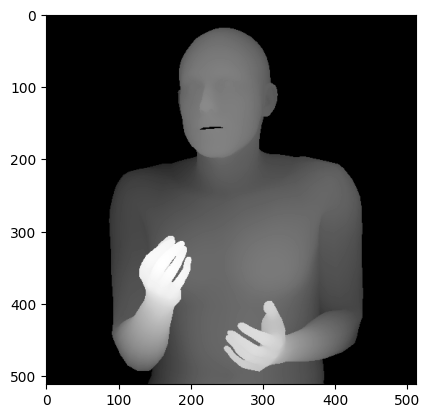

In [6]:
def normalize_depth_01(x):
    x_flat = x.view(x.size(0), -1)
    x_valid = x_flat[x_flat >= 0.0]
    if x_valid.size(0) == 0:
        print('invalid depth')
        return x
    x_valid_min = x_valid.min()
    x_valid_max = x_valid.max()
    x_valid = (x_valid - x_valid_min) / (x_valid_max - x_valid_min)
    x_valid = 1.0 - x_valid
    x_valid = 0.1 + (x_valid * 0.9)
    x_norm = torch.zeros_like(x_flat)
    x_norm[x_flat >= 0.0] = x_valid
    return x_norm.view(x.size(0), x.size(1), x.size(2), x.size(3))

file = glob.glob('./data/john-oliver-SHOW1/JO_SHOW1/depths/*')
file = file[0]
depth = np.load(file) / 10.
print(torch.from_numpy(depth[None]).shape, depth.max(), depth.min())
plt.imshow(normalize_depth_01(torch.from_numpy(depth[None]))[0].detach().cpu().numpy() * 255, cmap='gray')


In [42]:
print(timesteps)
tot = 0
for i in range(len(timesteps)):
    tot += timesteps[i][1]
print(tot)

[('00_00_02-00_00_12', 300), ('00_00_12-00_00_14', 60), ('00_00_19-00_00_29', 300), ('00_01_07-00_01_17', 300), ('00_01_17-00_01_27', 300), ('00_01_27-00_01_37', 300), ('00_01_37-00_01_41', 120), ('00_01_42-00_01_52', 300), ('00_01_52-00_01_57', 150), ('00_02_17-00_02_23', 180), ('00_02_23-00_02_26', 90), ('00_02_26-00_02_36', 300), ('00_02_36-00_02_46', 300), ('00_02_46-00_02_56', 300), ('00_03_42-00_03_49', 210), ('00_04_11-00_04_21', 300), ('00_04_22-00_04_26', 120), ('00_04_39-00_04_49', 300), ('00_04_49-00_04_59', 300), ('00_04_59-00_05_09', 300), ('00_05_09-00_05_19', 300), ('00_05_19-00_05_29', 300), ('00_05_29-00_05_32', 90), ('00_05_51-00_06_01', 300), ('00_06_23-00_06_29', 180), ('00_06_34-00_06_41', 210), ('00_06_48-00_06_58', 300), ('00_06_58-00_07_08', 300), ('00_07_08-00_07_18', 300), ('00_07_18-00_07_23', 150), ('00_08_13-00_08_17', 120), ('00_08_17-00_08_27', 300), ('00_08_27-00_08_37', 300), ('00_08_48-00_08_58', 300), ('00_08_58-00_09_08', 300), ('00_09_45-00_09_55', 

In [16]:
files = glob.glob('./data/john-oliver-SHOW1/oliver_videos/*.mp4')
videos = []
for i in tqdm.tqdm(range(min(1, len(files)))):
    vr = decord.VideoReader(files[i])
    batch_idx = np.arange(len(vr))
    video = vr.get_batch(batch_idx)
    videos.append(video)
videos = torch.cat(videos, 0)
print(videos.shape)

100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

torch.Size([337, 720, 1280, 3])


In [47]:
def to_sec(time):
    hh, mm, ss = time.split(':')
    hh, mm, ss = int(hh), int(mm), int(ss)
    return hh* 3600 + mm * 60 + ss

clip = VideoFileClip('./data/seth_video_full.mp4')
# clip = clip.set_fps(30)
clips = []
for i in tqdm.tqdm(range(len(timesteps))):
    st, en = timesteps[i][0].split('-')
    st = st.replace('_', ':')
    en = en.replace('_', ':')
    clip_i = clip.subclip(to_sec(st), to_sec(en))
    if clip_i.duration * int(clip_i.fps) != timesteps[i][1]:
        print(clip_i.duration, int(clip_i.fps), timesteps[i][1])
        print(st, en)
        break
    clips.append(clip_i)

  0%|          | 0/43 [00:00<?, ?it/s]

10 29 300
00:00:02 00:00:12


In [44]:
clips_all = concatenate_videoclips(clips)
print(clips_all.duration * int(clips_all.fps))
clips_all.write_videofile('./data/seth-SHOW1.mp4')

10208
Moviepy - Building video ./data/seth-SHOW1.mp4.
MoviePy - Writing audio in seth-SHOW1TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./data/seth-SHOW1.mp4



Moviepy - Done !
Moviepy - video ready ./data/seth-SHOW1.mp4


10550
(720, 1280, 3)


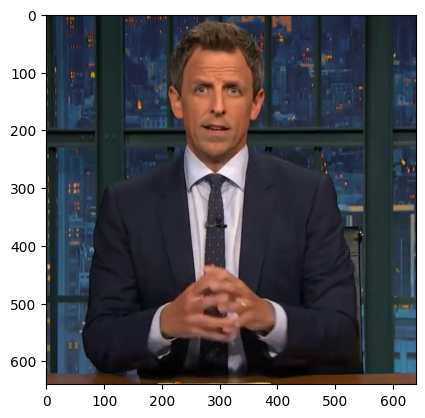

In [46]:
clip_ = VideoFileClip('./data/seth-SHOW1.mp4')
print(int(clip_.fps * clip_.duration))
frame = clip_.get_frame(0)
print(frame.shape)
crop_x, crop_y = 40, 350
plt.imshow(frame[crop_x:crop_x+640, crop_y:crop_y+640])

In [25]:
clips_cropped = clips_all.crop(x1=40, y1=350, x2=680, y2=990).resize(height=512, width=512)
clips_cropped.write_videofile('./data/seth-SHOW1-40-350-640.mp4')

Moviepy - Building video ./data/seth-SHOW1-40-350-640.mp4.
MoviePy - Writing audio in seth-SHOW1-40-350-640TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video ./data/seth-SHOW1-40-350-640.mp4



Moviepy - Done !
Moviepy - video ready ./data/seth-SHOW1-40-350-640.mp4


In [6]:
videos_npy = videos.numpy()
save_path = './data/john-oliver-SHOW1.mp4'
moviepy.editor.ImageSequenceClip(sequence=[(videos_npy[i]).clip(0.0, 255.0).round().astype(np.uint8) 
                                                for i in range(videos_npy.shape[0])], fps=vr.get_avg_fps()).write_videofile(save_path)

Moviepy - Building video ./data/john-oliver-SHOW1.mp4.
Moviepy - Writing video ./data/john-oliver-SHOW1.mp4



Moviepy - Done !
Moviepy - video ready ./data/john-oliver-SHOW1.mp4


In [4]:
files = glob.glob('./data/kanghui/depth/*.png')
print(len(files))
files = glob.glob('./data/kanghui/nerf_images/*.png')
print(len(files))

5214
5214


(512, 512, 4)
255


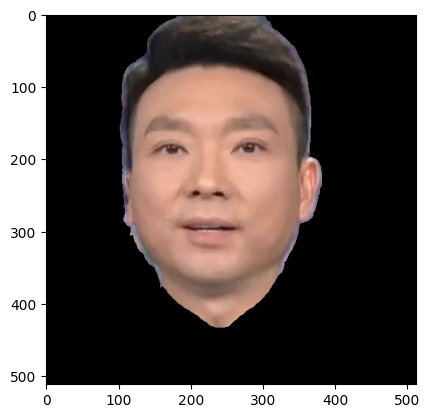

In [21]:
img = Image.open('./data/kanghui/nerf_images/00000.png')
img = np.array(img)
print(img.shape)
print(img[...,-1].max())
plt.imshow(img[...,:3], cmap='gray')

In [3]:
img = Image.open('data/kanghui/facemesh/0.png')
img = np.array(img)
print(img.shape)

(512, 512, 3)


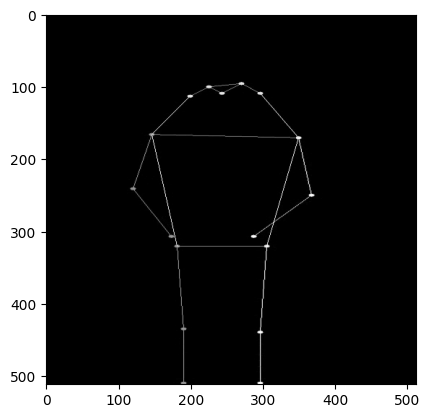

(512, 512, 1)
254


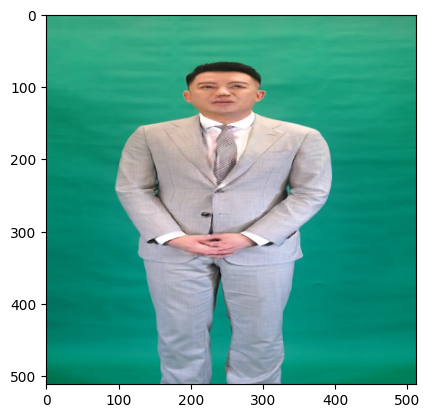

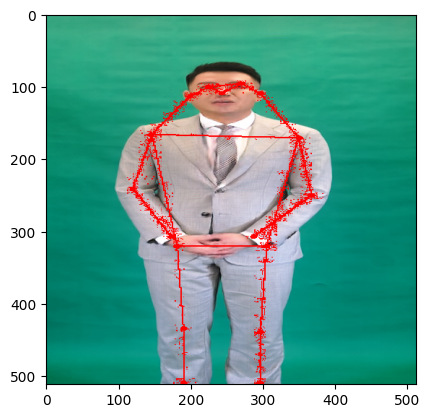

In [12]:
path = './results/C0209-custom-2prev-2next-ViTPose/test_latest/images/000003_feature_map.png'
img = imread(path)
img = img.reshape(512, 512, 1)
plt.imshow(img, cmap='gray')
plt.show()
print(img.shape)

path = './results/C0209-custom-2prev-2next-ViTPose/test_latest/images/000003_pred_fake.png'
img2 = imread(path)
print(img2.max())
plt.imshow(img2)
plt.show()

red = np.ones_like(img2) * 0
red[:,:,0] = 255
combined = (img > img.min()) * red + (img == img.min()) * img2
plt.imshow(combined)

In [10]:
path = glob.glob('./results/Obama1/test_latest/images/*_fake.png')
path.sort()
# print(path)
for i in tqdm.tqdm(range(len(path))):
    img = Image.open(path[i])
    img.save('./data/Obama1/training_imgs/%06d_gt.png'%i)

 56%|█████▌    | 2742/4896 [03:21<02:37, 13.65it/s]

In [7]:
change_paras = np.load('./data/Obama1/change_paras.npz')
scale, xc, yc = change_paras['scale'], change_paras['xc'], change_paras['yc']
x_min, x_max, y_min, y_max = xc-256, xc+256, yc-256, yc+256
print(xc, yc)
print(x_min, x_max, y_min, y_max)
if x_min == 0 or x_max == 512 or y_min == 0 or y_max == 512:
    top, bottom, left, right = abs(yc-256-y_min), abs(yc+256-y_max), abs(xc-256-x_min), abs(xc+256-x_max)
    image_pad = [top, bottom, left, right] 
    print(image_pad)

915 310
659 1171 54 566


In [12]:
from skimage.color import rgb2gray
from skimage.io import imread
# image = np.array(Image.open('/data/amahapat/LiveSpeechPortraits/data/Obama/FaceMesh/10.png').convert('L'))
image = imread('/data/amahapat/LiveSpeechPortraits/data/Obama/candidates/normalized_full_0.png')
image = rgb2gray(image)
image = np.array(image)
# image = (image>0)*1
# print(image.min(), image.max())
# image2 = np.array(Image.open('./results/Obama1/test_latest/images/000000_feature_map.png'))
# image = (image==128)*1 + (image==0)*0
plt.imshow(image, cmap='gray')
plt.show()
# plt.imshow(image2, cmap='gray')
print(image.shape)
# print(image2.shape)
# print(image.min(), image.max())
# print(image2.min(), image2.max())

SyntaxError: invalid syntax (2065480324.py, line 7)

In [4]:
img_list = glob.glob('/data/amahapat/LiveSpeechPortraits/data/Obama/FaceMesh/*.png')
img_list = glob.glob('/data/amahapat/LiveSpeechPortraits/data/Obama/Origin/*.png')
print(len(img_list))

4800


In [5]:
img_list = sorted(img_list, key = lambda x: int(x.split('/')[-1].split('.')[0]))

In [4]:
a = np.array([3,4,5,6])
print(a[-4:])

[3 4 5 6]


In [1]:
import glob
gt_img_path = glob.glob('./data/Output/Origin/*.png')
gt_img_path = sorted(gt_img_path, key = lambda x: int(x.split('/')[-1].split('.')[0]))

split = int(len(gt_img_path)*(80/100))
gt_img_path = gt_img_path[split:]
print(gt_img_path[0])

./data/Output/Origin/3843.png


In [4]:
import moviepy
import moviepy.editor 

img_list = []
feat_list = []
gt_img_list = []
web_dir = './results/kanghui-shoulder-custom-2prev-2next/test_latest'
tot_frames = len(glob.glob(web_dir+'/images/*pred_fake.png'))
print(tot_frames)
# for i in range(len(dataset)-1):
for i in range(2, tot_frames+2):
    img_path = web_dir + '/images/%06d_pred_fake.png'%i
    img_list.append(img_path)
    feat_path = web_dir + '/images/%06d_feature_map.png'%i
    feat_list.append(feat_path)
    gt_img_path = web_dir + '/images/%06d_pred_real.png'%i
    gt_img_list.append(gt_img_path)
outVid = []
for i in tqdm.tqdm(range(len(img_list))):
    img = img_list[i]
    img_ = Image.open(img).convert("RGB")
    img_ = np.array(img_)
    gt_img = gt_img_list[i]
    gt_img_ = Image.open(gt_img).convert("RGB")
    gt_img_ = np.array(gt_img_)
    feat = feat_list[i]
    feat_ = Image.open(feat).convert("RGB")
    feat_ = np.array(feat_)
    out = np.concatenate((feat_, img_), axis=1)
    out = np.concatenate((out, gt_img_), axis=1)
    outVid.append(out)
moviepy.editor.ImageSequenceClip(sequence=[(npyFrame).clip(0.0, 255.0).round().astype(np.uint8) for npyFrame in outVid], fps=30).write_videofile(web_dir+'/generated_video.mp4')

3996


100%|██████████| 3996/3996 [01:17<00:00, 51.59it/s]


Moviepy - Building video ./results/kanghui-shoulder-custom-2prev-2next/test_latest/generated_video.mp4.
Moviepy - Writing video ./results/kanghui-shoulder-custom-2prev-2next/test_latest/generated_video.mp4



Moviepy - Done !
Moviepy - video ready ./results/kanghui-shoulder-custom-2prev-2next/test_latest/generated_video.mp4


In [1]:
import numpy as np
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

def normalized_landmark2pixel(
    landmark: list,
    height: int,
    width: int
):
    pixel_height = int(landmark[0]*height)
    pixel_width = int(landmark[1]*width)
    return pixel_height,pixel_width

file = './data/luoxiang_16min/luoxiang_16min_shoulders.npy'
# file = 'test_face_shoulders.npy'

image_height = 512
image_width = 512
coordinates_list = np.load(file, allow_pickle=True)
print('The shape of npy is'+ str(coordinates_list.shape))
# for coordinate in coordinates_list:
#     print(coordinate)

frame_count = 0

for frame in coordinates_list[10:11]:
    canvas = np.zeros((image_height, image_width, 3), dtype = "uint8")  # Make all black canvas.
    for landmark in frame[:140]:
        print(landmark)
        pixel_height, pixel_width = normalized_landmark2pixel(landmark, image_height, image_width)
        cv2.circle(canvas, (pixel_height, pixel_width), 1,(255,255,255), 1)
    # plt.imshow("Conditional Feature Map",canvas)
    cv2.imwrite('out_img.png', canvas)
    frame_count+=1
    print('Successfully recover frame ' + str(frame_count))
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break


The shape of npy is(28761, 147, 3)
[ 0.36369279  0.48764294 -0.08576113]
[ 0.3590976   0.43542325 -0.07590689]
[0.18377177 0.3004398  0.06947846]
[0.33095282 0.07442069 0.00788126]
[ 0.36986762  0.51668084 -0.06565823]
[ 0.37276471  0.53613067 -0.06060371]
[ 0.37724674  0.57926083 -0.06450993]
[0.1002287  0.23184846 0.21251255]
[0.17559861 0.2978681  0.07886491]
[ 0.33441794  0.48764861 -0.07779418]
[ 0.30793455  0.50207454 -0.06043125]
[ 0.29460523  0.51909453 -0.04067504]
[0.13894957 0.26212013 0.06761373]
[ 0.27940047  0.40069506 -0.05330274]
[0.19076185 0.22946699 0.0151097 ]
[0.15874699 0.24216232 0.03913026]
[0.11464822 0.18324921 0.16275644]
[ 0.29604876  0.23285605 -0.01946871]
[0.1502206  0.57038009 0.24710101]
[0.2841073  0.54593891 0.00129805]
[0.14459446 0.22870149 0.05591867]
[ 0.23602132  0.22509675 -0.00457388]
[ 0.22848025  0.20545723 -0.0069671 ]
[0.19564711 0.10846996 0.05654794]
[0.12528393 0.2546128  0.09399623]
[ 0.30013523  0.54011601 -0.00835498]
[ 0.31986007  0.

In [9]:
path = '/data/user/aniruddha/LiveSpeechPortraits/data/luoxiang_16min/FaceMesh/'
files = glob.glob(path + '*')
print(len(files))

27074


In [ ]:
path = '/data/datasets/lsp/generative/test/kanghui_pred/facemesh_shoulder/'
import os
os.system('cp -R ')

In [ ]:
path = '/NAS5/speech/data/multimodal/avatar/lsp/video/kanghui/'

In [6]:
import moviepy
import moviepy.editor 

gt_img_list = []
web_dir = './results/kanghui-shoulder-custom-2prev-2next-full/test_latest'
tot_frames = len(glob.glob(web_dir+'/images/*pred_fake.png'))
print(tot_frames)
# for i in range(len(dataset)-1):
for i in range(2, tot_frames+2):
    gt_img_path = web_dir + '/images/%06d_pred_real.png'%i
    gt_img_list.append(gt_img_path)
outVid = []
for i in tqdm.tqdm(range(50,550)):
    gt_img = gt_img_list[i]
    gt_img_ = Image.open(gt_img).convert("RGB")
    gt_img_ = np.array(gt_img_)
    outVid.append(gt_img_)
moviepy.editor.ImageSequenceClip(sequence=[(npyFrame).clip(0.0, 255.0).round().astype(np.uint8) for npyFrame in outVid], fps=60).write_videofile('/home/aniruddha/RobustVideoMatting/kanghui_test.mp4')

3996


100%|██████████| 500/500 [00:04<00:00, 112.19it/s]


Moviepy - Building video /home/aniruddha/RobustVideoMatting/kangiu_test.mp4.
Moviepy - Writing video /home/aniruddha/RobustVideoMatting/kangiu_test.mp4



Moviepy - Done !
Moviepy - video ready /home/aniruddha/RobustVideoMatting/kangiu_test.mp4


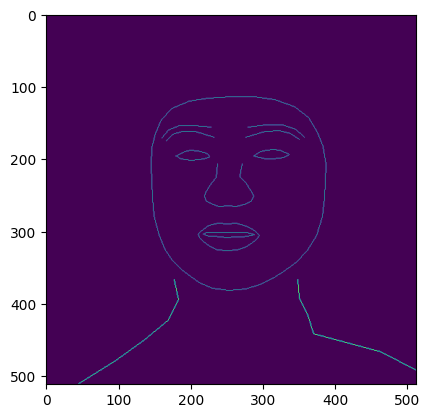

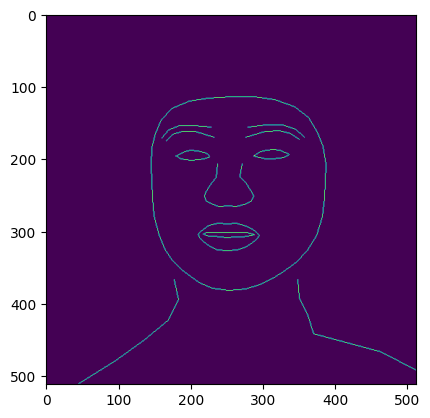

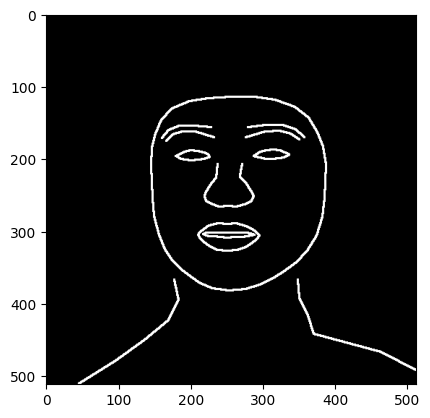

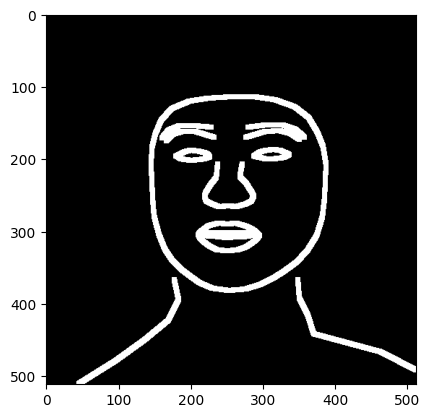

In [4]:
from PIL import Image, ImageMorph, ImageFilter

# Open star image and ensure greyscale
im = Image.open('./data/kanghui_/facemesh_shoulder/1.png').convert('L')
plt.imshow(im)
plt.show()
# Detect edges and save
edges = im.filter(ImageFilter.FIND_EDGES)
# edges.save('DEBUG-edges.png')
plt.imshow(edges)
plt.show()

# Make fatter edges and save
fatEdges = edges.filter(ImageFilter.MaxFilter)
# fatEdges.save('DEBUG-fatEdges.png')
plt.imshow(fatEdges, cmap='gray')
plt.show()

# Make very fat edges and save
veryFatEdges = edges.filter(ImageFilter.MaxFilter(7))
# veryFatEdges.save('DEBUG-veryFatEdges.png')
plt.imshow(veryFatEdges, cmap='gray')
plt.show()

In [4]:
import mediapipe as mp
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [25]:
path = './data/full_body_2/origin'
files = glob.glob(path+'/*.png')
files.sort()
save_path = './data/full_body_2/body_mesh'
os.makedirs(save_path, exist_ok=True)

with mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
  
  for i in tqdm.tqdm(range(len(files))):
    name = files[i].rstrip('\n').split('/')[-1]
    image = Image.open(files[i]).convert('RGB')
    image = np.array(image)
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Print nose landmark.
    image_hight, image_width, _ = image.shape
    if not results.pose_landmarks:
        print(name)
        continue
    # print(
    #   f'Nose coordinates: ('
    #   f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
    #   f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
    # )

    # Draw pose landmarks.
    # print(f'Pose landmarks of {name}:')
    annotated_image = np.zeros_like(image).copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # resize_and_show(annotated_image)
    # plt.imshow(annotated_image)
    # plt.show()
    annotated_image = Image.fromarray(annotated_image).convert('L')
    annotated_image.save(os.path.join(save_path, name))

  0%|          | 64/27852 [00:10<1:16:11,  6.08it/s]


KeyboardInterrupt: 

In [6]:
# loading video gfg
# loading video dsa gfg intro video
save_path = './data/C0209_cropped/body_mesh_vit'
os.makedirs(save_path, exist_ok=True)
clip = moviepy.editor.VideoFileClip("./data/vis_C0209_cropped.mp4")
print(int(clip.fps * clip.duration))
frames = clip.iter_frames()
counter = 0

def save_frame(i, value):
    img = Image.fromarray(value).convert('RGB')
    img.save(os.path.join(save_path, '%05d.png'%i))
# using loop to transverse the frames
# for value in tqdm.tqdm(frames):
#     # incrementing the counter
#     img = Image.fromarray(value).convert('RGB')
#     img.save(os.path.join(save_path, '%05d.png'%counter))
#     counter += 1
#     # break
     
# printing the value of the counter
# print("Counter Value ", end = " : ")
# print(counter)
Parallel(n_jobs=joblib.cpu_count())(delayed(save_frame)(i, value) for i, value in enumerate(frames))

24181


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [9]:
path = './data/jhon_oliver_long/Alex_Jones_-_Last_Week_Tonight_with_John_Oliver_HBO-WyGq6cjcc3Q/214036-00_02_35-00_02_45/214036-00_02_35-00_02_45.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)
print(data.keys())
print(data['width'], data['height'], data['center'])

dict_keys(['losses_to_log', 'width', 'height', 'center', 'batch_size', 'camera_transl', 'focal_length', 'expression', 'jaw_pose', 'betas', 'global_orient', 'transl', 'left_hand_pose', 'right_hand_pose', 'leye_pose', 'reye_pose', 'pose_embedding', 'mica_head_transl', 'body_pose_axis'])
1280 720 [640.0, 360.0]


In [ ]:
save_folder = './data/jhon_oliver_long/video_shards'
os.makedirs(save_folder, exist_ok=True)
files = glob.glob('./data/jhon_oliver_long/Alex_Jones_-_Last_Week_Tonight_with_John_Oliver_HBO-WyGq6cjcc3Q/*')
files.sort()
for i in range(len(files)):
    file = files[i]
    name = file.split('/')[-1]
    st, en = name.split('-')[1:]
    st = st.replace('_', ':')
    en = en.replace('_', ':')
    save_path = os.path.join(save_folder, f'{name}.mp4')
    os.system(f'yt-dlp https://www.youtube.com/watch?v=WyGq6cjcc3Q -f mp4 --download-sections *{st}-{en} -o {save_path}')

(512, 512, 3) 0 255


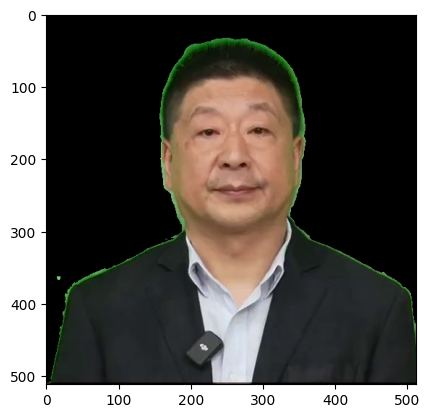

In [8]:
path = './data/pingan_upper1/images/00000.png'
img = imread(path)[...,:3]
print(img.shape, img.min(), img.max())
plt.imshow(img, cmap='gray')

In [7]:
path = './data/pingan_upper1/images/00000.png'
img = Image.open(path)
img= np.array(img)
print(img.shape)
# plt.imshow(img[:,:,:3])
# plt.show()
# plt.imshow(img[:,:,:3].sum(-1)==0)
save_img = Image.fromarray(img[:,:,3]).convert('L')
save_img.save('./image.png')
save_img = Image.fromarray(((img[:,:,:3].sum(-1)==0)*255).astype(np.uint8))
save_img.save('./mask.png')


(512, 512, 4)
